In [127]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score



In [100]:
#importing datasets
dataset=pd.read_csv("Wine Quality Prediction.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [101]:
print(dataset.shape)
print(dataset.isnull().sum())


(1599, 12)
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [143]:
duplicate_rows_df=dataset[dataset.duplicated()] 
dataset=dataset.drop_duplicates()#drop duplicates
print("number of duplicate rows:",duplicate_rows_df.shape)
print(dataset.shape)

number of duplicate rows: (0, 12)
(1359, 12)


In [103]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

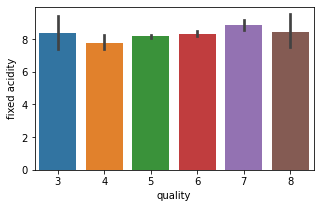

In [104]:
fig=plt.figure(figsize=(5,3))
sns.barplot(x='quality',y='fixed acidity',data=dataset)

#It shows that quality has nothing to do with fixed acidity

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

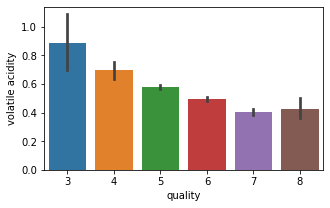

In [105]:
fig=plt.figure(figsize=(5,3))
sns.barplot(x='quality',y='volatile acidity',data=dataset)

# High quality wine is less volatile in nature

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

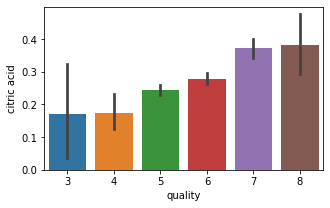

In [106]:
fig=plt.figure(figsize=(5,3))
sns.barplot(x='quality',y='citric acid',data=dataset)

#Good quality wine have high composition citric acid

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

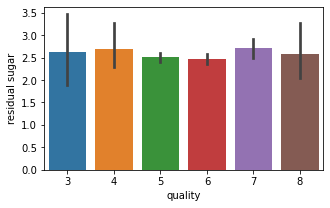

In [107]:
fig=plt.figure(figsize=(5,3))
sns.barplot(x='quality',y='residual sugar',data=dataset)

#Residual sugar doesn't have much impact on the quality of wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

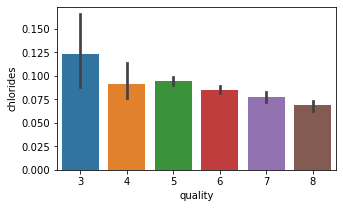

In [108]:
fig=plt.figure(figsize=(5,3))
sns.barplot(x='quality',y='chlorides',data=dataset)

#Good quality wine have less chloride component

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

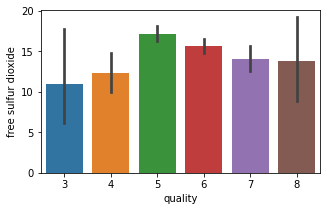

In [109]:
fig=plt.figure(figsize=(5,3))
sns.barplot(x='quality',y='free sulfur dioxide',data=dataset)

#The composition of sulfur dioxide doesn't impact the quality of wine

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

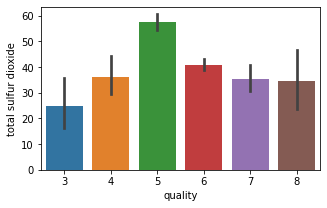

In [110]:
fig=plt.figure(figsize=(5,3))
sns.barplot(x='quality',y='total sulfur dioxide',data=dataset)

#The quality doesn't depend on total sulphur dioxide

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

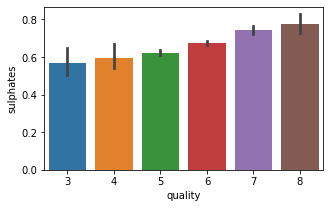

In [111]:
fig=plt.figure(figsize=(5,3))
sns.barplot(x='quality',y='sulphates',data=dataset)

# With increase in Sulphur composition the quality increases

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

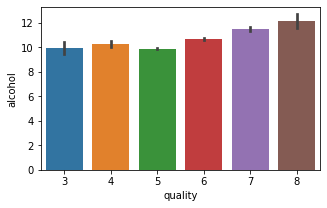

In [112]:
fig=plt.figure(figsize=(5,3))
sns.barplot(x='quality',y='alcohol',data=dataset)

#With increase in the composition of alcohol the quality increases

## HEATMAP

<AxesSubplot:>

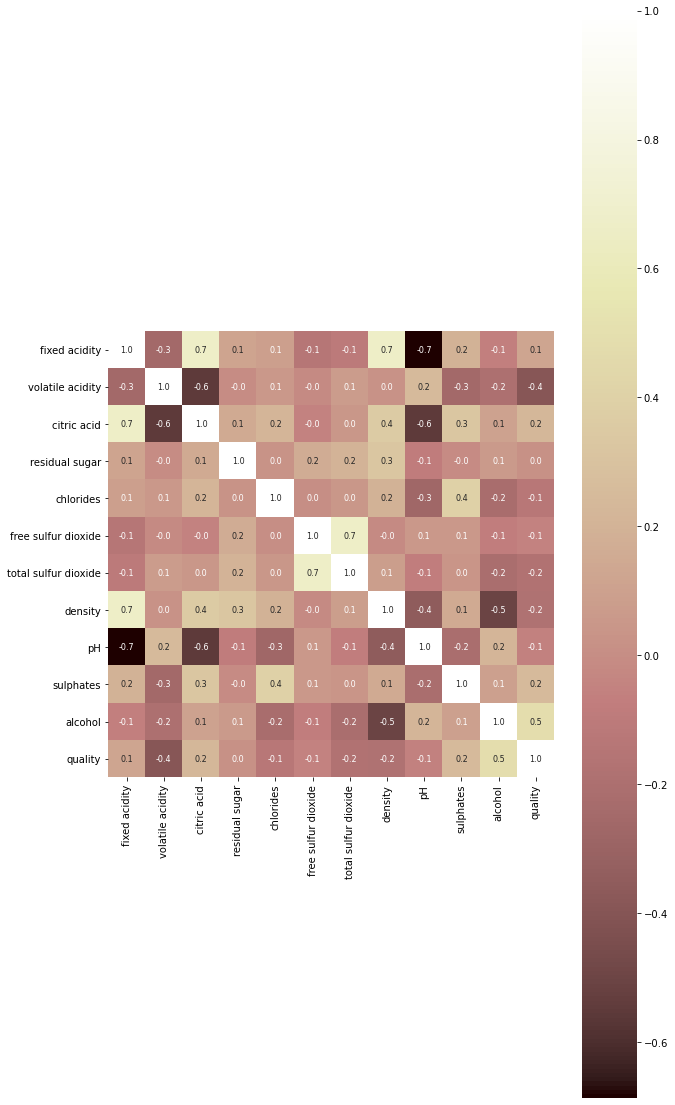

In [113]:
plt.subplots(figsize=(10,20))
sns.heatmap(dataset.corr(),cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="pink")

In [166]:
print(dataset['quality'].value_counts())

1    1175
0     184
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

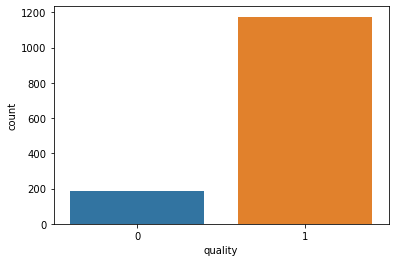

In [167]:
sns.countplot(x=dataset['quality'])

In [149]:
# Create Classification version of target variable
dataset['goodquality'] = [1 if x >= 6.5 else 0 for x in dataset['quality']]
# Separate feature variables and target variable
X = dataset.drop(['quality','goodquality'], axis = 1)
y = dataset['goodquality']

In [150]:
# See proportion of good vs bad wines
dataset['goodquality'].value_counts()

0    1359
Name: goodquality, dtype: int64

In [151]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

#Standardizing the data means that it will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1. 
#It’s important to standardize your data in order to equalize the range of the data.

## DECISION TREE

In [154]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        11
           2       0.60      0.56      0.58       120
           3       0.45      0.48      0.46       103
           4       0.31      0.39      0.34        31
           5       0.00      0.00      0.00         3

    accuracy                           0.47       272
   macro avg       0.23      0.24      0.23       272
weighted avg       0.47      0.47      0.47       272



# RANDOM FOREST CLASSIFIER

In [164]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        11
           2       0.72      0.75      0.73       120
           3       0.59      0.71      0.64       103
           4       0.65      0.42      0.51        31
           5       0.00      0.00      0.00         3

    accuracy                           0.65       272
   macro avg       0.33      0.31      0.31       272
weighted avg       0.61      0.65      0.63       272



# Test Case

In [176]:
model=LogisticRegression()
model.fit(x_train,y_train)
test_case_list=[7.4,0.36,0.3,1.8,0.074,17,24,0.99419,3.24,0.7,13.4]
test_case_df=pd.DataFrame(test_case_list)
test_case=test_case_df.T
test_case_scaled=sc.transform(test_case)
test_case_prediction=model.predict(test_case_scaled)
if(test_case_prediction == 0):
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")


Bad Quality Wine
